In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [31]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [2]:
df=pd.read_csv("dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


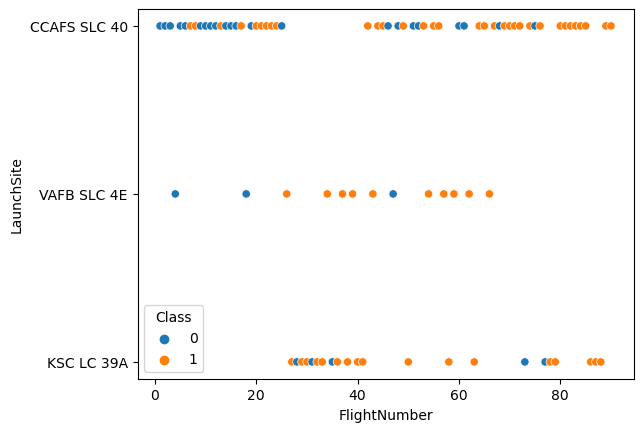

In [3]:
sns.scatterplot(x="FlightNumber", y ="LaunchSite", data = df, hue="Class")


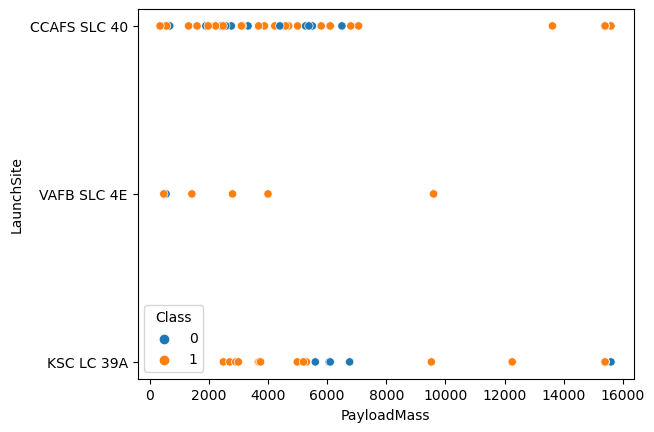

In [4]:
sns.scatterplot(x="PayloadMass", y ="LaunchSite", data = df, hue="Class")



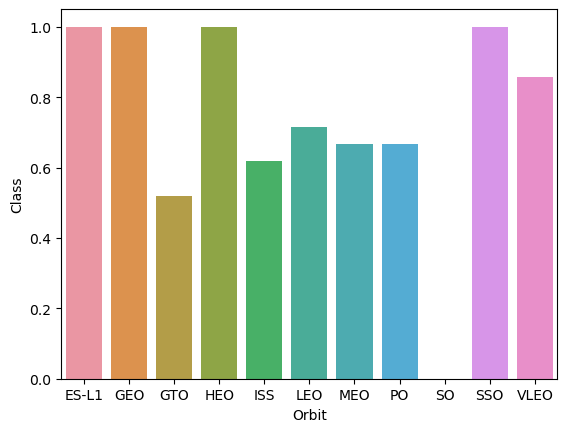

In [5]:
success_rates = df.groupby('Orbit')['Class'].mean().reset_index()

sns.barplot(x="Orbit", y ="Class", data = success_rates)


<Axes: xlabel='FlightNumber', ylabel='Orbit'>

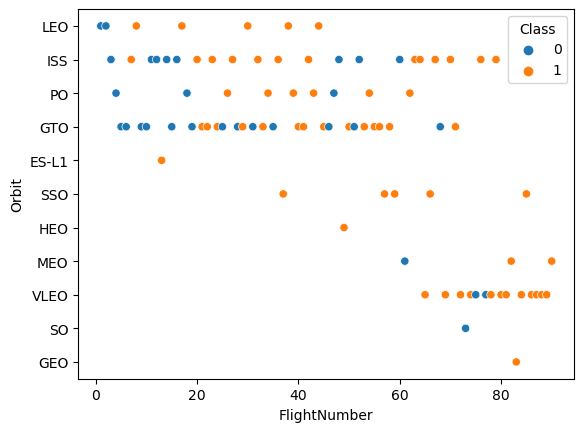

In [6]:
sns.scatterplot(x="FlightNumber", y ="Orbit", data = df, hue="Class")

<Axes: xlabel='PayloadMass', ylabel='Orbit'>

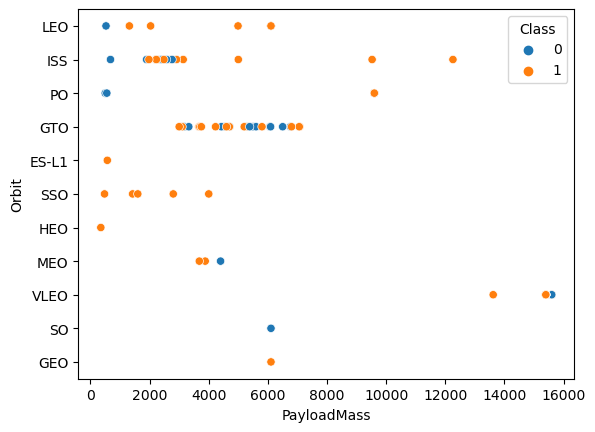

In [7]:
sns.scatterplot(x="PayloadMass", y ="Orbit", data = df, hue="Class")

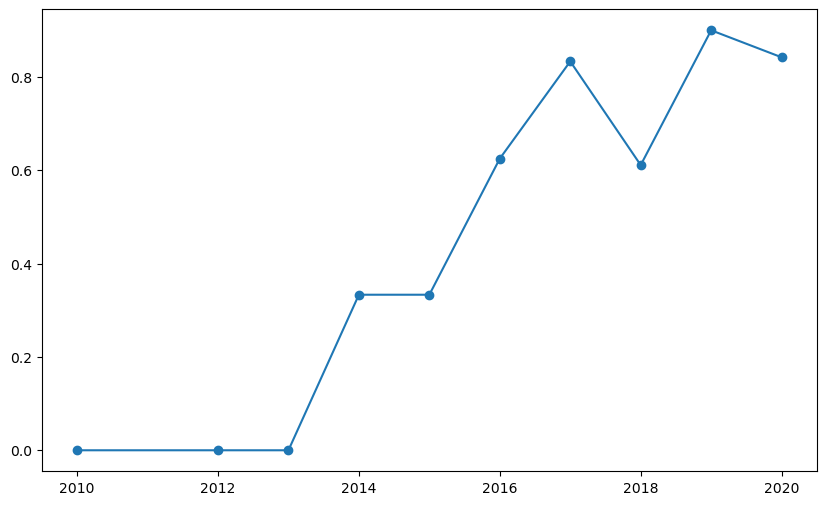

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
yearly_avg_success_rate = df.groupby('Year')['Class'].mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_success_rate.index, yearly_avg_success_rate.values, marker='o')

In [9]:
df[df['LaunchSite'].str.startswith('CCA')].head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0,2014


In [10]:
df['PayloadMass'].sum()

549446.3470588236

In [11]:
df[df['BoosterVersion'] == 'Falcon 9']['PayloadMass'].mean()

6104.959411764707

In [12]:
df[(df['Outcome'].str.contains('True')) & (df['LandingPad'].notnull())]['Date'].min()

Timestamp('2015-12-22 00:00:00')

In [13]:
a = df[(df['Outcome'] == 'True ASDS') & (df['PayloadMass'] > 4000) & (df['PayloadMass'] < 6000)]

a[["FlightNumber", "Date", "BoosterVersion", "PayloadMass", "Orbit", "Outcome"]].set_index("FlightNumber")

,Date,BoosterVersion,PayloadMass,Orbit,Outcome
FlightNumber,,,,,
21,2016-05-06,Falcon 9,4696.0,GTO,True ASDS
24,2016-08-14,Falcon 9,4600.0,GTO,True ASDS
29,2017-03-30,Falcon 9,5300.0,GTO,True ASDS
40,2017-10-11,Falcon 9,5200.0,GTO,True ASDS
55,2018-08-07,Falcon 9,5800.0,GTO,True ASDS
70,2019-12-05,Falcon 9,5000.0,ISS,True ASDS


In [14]:
success_count = df[df['Outcome'].str.contains('True')]['Outcome'].count()
failure_count = df[df['Outcome'].str.contains('False')]['Outcome'].count()
print(success_count)
print(failure_count)

60
9


In [15]:
max_payload = df['PayloadMass'].max()  # Find the maximum payload mass
df[df['PayloadMass'] == max_payload]

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
68,69,2019-11-11,Falcon 9,15600.0,VLEO,CCAFS SLC 40,True ASDS,4,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,4,B1048,-80.577366,28.561857,1,2019
73,74,2020-01-29,Falcon 9,15600.0,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.577366,28.561857,1,2020
76,77,2020-03-18,Falcon 9,15600.0,VLEO,KSC LC 39A,False ASDS,5,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,4,B1048,-80.603956,28.608058,0,2020


In [16]:
df[(df['Outcome'].str.contains('False')) & (df['Date'].dt.year == 2015)][['BoosterVersion', 'LaunchSite', "Date"]]

,BoosterVersion,LaunchSite,Date
11,Falcon 9,CCAFS SLC 40,2015-01-10
13,Falcon 9,CCAFS SLC 40,2015-04-14


In [17]:
df[df['Date'].dt.year == 2015]

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
11,12,2015-01-10,Falcon 9,2395.0,ISS,CCAFS SLC 40,False ASDS,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1012,-80.577366,28.561857,0,2015
12,13,2015-02-11,Falcon 9,570.0,ES-L1,CCAFS SLC 40,True Ocean,1,True,False,True,NaN,1.0,0,B1013,-80.577366,28.561857,1,2015
13,14,2015-04-14,Falcon 9,1898.0,ISS,CCAFS SLC 40,False ASDS,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1015,-80.577366,28.561857,0,2015
14,15,2015-04-27,Falcon 9,4707.0,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1016,-80.577366,28.561857,0,2015
15,16,2015-06-28,Falcon 9,2477.0,ISS,CCAFS SLC 40,None ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,1.0,0,B1018,-80.577366,28.561857,0,2015
16,17,2015-12-22,Falcon 9,2034.0,LEO,CCAFS SLC 40,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,1.0,0,B1019,-80.577366,28.561857,1,2015


In [18]:
filtered_data = df[(df['Date'] >= '2010-06-04') & (df['Date'] <= '2017-03-20')]

landing_outcomes_ranked = filtered_data['Outcome'].value_counts().reset_index()
landing_outcomes_ranked.columns = ['LandingOutcome', 'Count']
landing_outcomes_ranked = landing_outcomes_ranked.sort_values(by='Count', ascending=False)
landing_outcomes_ranked

,LandingOutcome,Count
0,None None,9
1,True ASDS,5
2,False ASDS,4
3,True Ocean,3
4,True RTLS,3
5,False Ocean,2
6,None ASDS,2


In [21]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(URL2)

In [22]:
Y = pd.Series(data['Class'].to_numpy())

In [23]:
transform = preprocessing.StandardScaler()

X = transform.fit_transform(X)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [25]:
Y_test.shape

(18,)

In [26]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
logreg_cv.fit(X, Y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [27]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8222222222222222


In [29]:
logreg_cv.score(X_test, Y_test)



0.9444444444444444

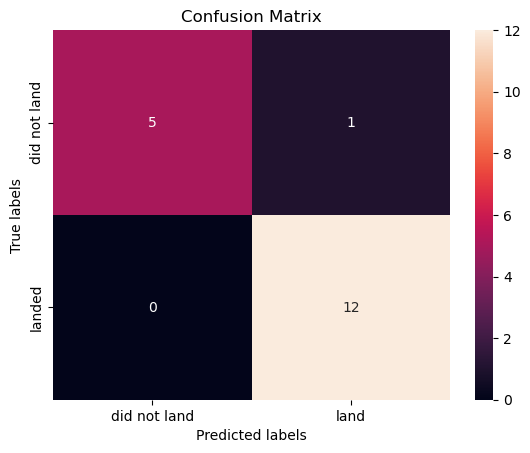

In [32]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [33]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)

svm_cv.fit(X, Y)

print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8222222222222223


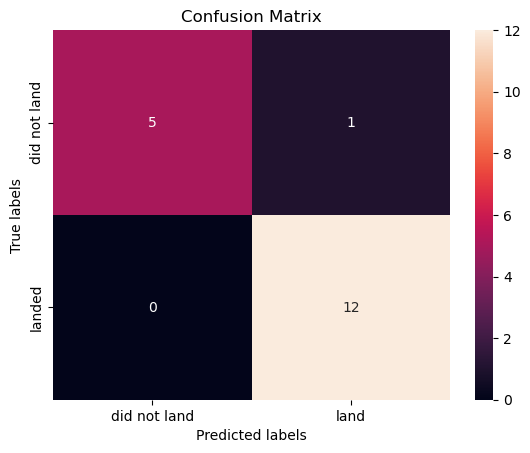

<Figure size 640x480 with 0 Axes>

In [34]:
svm_cv.score(X_test, Y_test)

yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
plt.savefig("bect_conf.png")

In [35]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)
a = tree_cv.fit(X, Y)

print("tuned hpyerparameters :(best parameters) ",a.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.9222222222222223


C:\Users\90553\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\90553\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\90553\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\90553\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 637, in _validate_params
    v

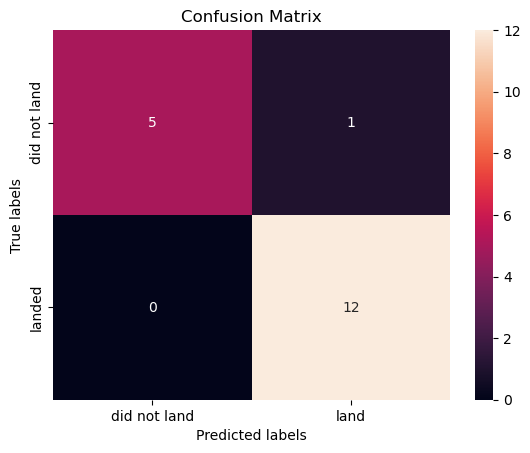

In [36]:
tree_cv.score(X_test, Y_test)

yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [37]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
knn_cv.fit(X, Y) 

print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
accuracy : 0.8444444444444444


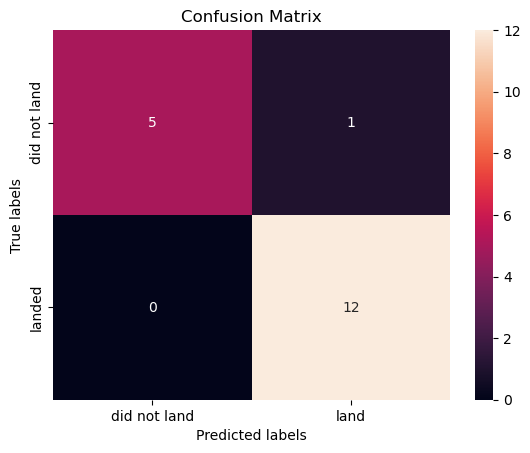

In [38]:
knn_cv.score(X_test, Y_test)

yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Best performing method: SVM
Accuracy of the best method: 0.9444444444444444


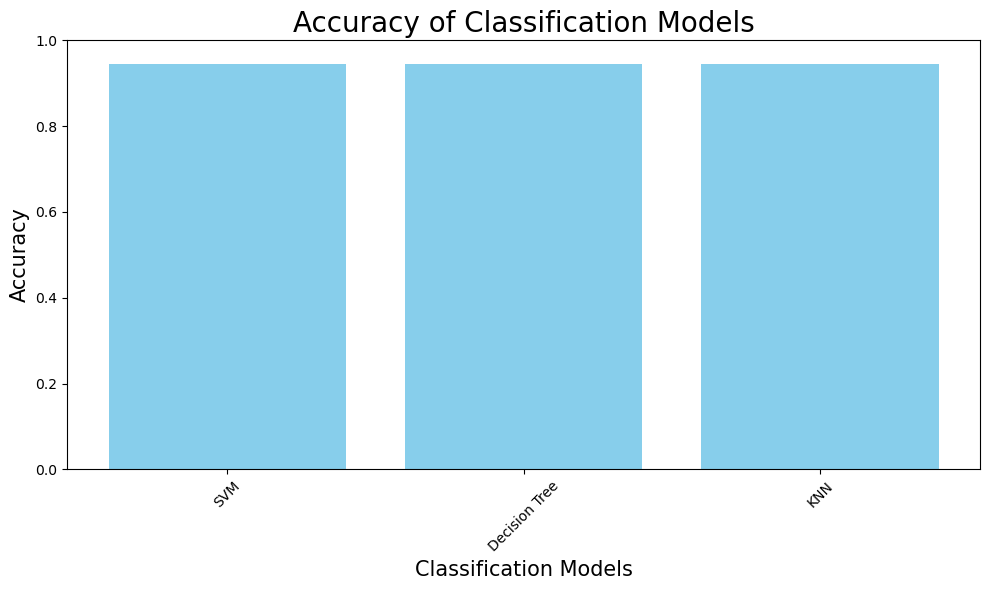

In [39]:
svm_best_model = svm_cv.best_estimator_
tree_best_model = a.best_estimator_
knn_best_model = knn_cv.best_estimator_

# Calculate the accuracy of each best-performing model on the test data (X_test, y_test)
svm_accuracy = svm_best_model.score(X_test, Y_test)  # Replace with your actual test data
tree_accuracy = tree_best_model.score(X_test, Y_test)
knn_accuracy = knn_best_model.score(X_test, Y_test)

# Find the method that performs best (highest accuracy on test data)
best_method = max([("SVM", svm_accuracy), ("Decision Tree", tree_accuracy), ("KNN", knn_accuracy)],
                  key=lambda x: x[1])

print("Best performing method:", best_method[0])
print("Accuracy of the best method:", best_method[1])

models = ['SVM', 'Decision Tree', 'KNN']
accuracies = [svm_accuracy, tree_accuracy, knn_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Classification Models', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Accuracy of Classification Models', fontsize=20)
plt.ylim(0, 1.0)  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("accuracy.png")